# Introduction and Problem Statement

**Introduction:**

Parkinson's disease (PD) is a neurodegenerative disorder of the central nervous system that primarily affects the motor system. The exact pathogenesis of PD remains incompletely understood, and current treatments focus on increasing dopamine levels in the brain. This poses a major challenge for the development of new and effective therapies.

Genome-wide association studies (GWAS) are a powerful tool for identifying genetic variants associated with complex diseases, such as PD. To date, more than 50 GWAS studies of PD have been published, and these studies have identified a large number of genetic risk factors for the disease. The data generated by these studies is helping us to better understand the underlying mechanisms of PD and to develop new diagnostic and therapeutic approaches.

Classification is a supervised machine learning task that involves training a model to predict the class labels of new data points based on a set of training data points with known class labels. Classification algorithms have been widely used in biomedical research to predict disease risk, identify disease subtypes, and develop personalized treatment plans.

**Problem Statement:**

Genome-wide association studies (GWAS) have provided a deeper understanding of the genetic basis of complex diseases, including Parkinson's disease (PD). However, there is still a need to identify new disease gene associations for PD. This research has the potential to generate new and improved hypotheses about the pathogenesis of PD.






# Importations

In [ ]:
#imports

import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from joblib import dump, load
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn import metrics

# Data Processing

## Data Importation

We used the DisGeNET database to extract 235 Parkinson's disease (PD) gene associations as the positive class. We created a random decoy protein set consisting of 250 proteins from UniProt as the negative class. We then used the Python-based tool Propy3 to build a tripeptide dataset for all 485 proteins in our dataset. This resulted in two files: one containing 8000 tripeptides for each of the 235 PD proteins and the other containing 8000 tripeptides for each of the 250 decoy set proteins.

⏬


In [ ]:
# dataset importation

df1 = pd.read_csv('/data/tripeptide_data_PD.csv', header=None)
df2 = pd.read_csv('/data/tripeptide_data_non-pd.csv', header=None)

print(df1.shape), print(df2.shape)

(235, 8000)
(250, 8000)


(None, None)

## Data Mangling

To prepare the dataset for training a machine learning model, we first added binary labels to the dataset and then concatenated it from both classes and shuffled it. Once we had shuffled the data, we looked for missing values and removed them from the dataset. These data preprocessing steps are important because they help to ensure that the data is in a format that is compatible with the machine learning algorithm and that it does not contain any missing values.

⏬

In [ ]:
# data mangling and cleaning

df1['label'] = 1
df2['label'] = 0
df = pd.concat([df1, df2], ignore_index=True)
df = shuffle(df)
print (df.shape), print (df)
df.fillna(method ='pad', inplace=True) # filling null values with pad

(485, 8001)
     0  1  2  3  4  5  6  7  8  9  ...  7991  7992  7993  7994  7995  7996  \
276  1  1  0  1  0  1  0  0  0  0  ...     1     0     0     0     1     0   
429  1  1  0  0  0  0  0  1  0  0  ...     0     0     0     0     0     0   
12   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
332  0  1  0  1  1  0  1  0  0  0  ...     0     0     0     1     0     0   
99   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
..  .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
284  0  0  0  0  0  0  2  0  0  0  ...     0     0     0     0     0     0   
255  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
366  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
145  2  0  0  0  0  0  1  2  1  1  ...     0     0     0     0     0     0   
229  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

     7997  7998  7999  label  
276     0     0     

## Features Extraction

We used the Pandas library to extract a sub-dataframe containing the features from our dataset. The features in our dataset consisted of 8000 tripeptides spanning over the samples, which came from two major sources.

⏬

In [ ]:
features = df.iloc[:, :-1]; features

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
276,1,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
429,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
332,0,1,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
145,2,0,0,0,0,0,1,2,1,1,...,0,0,0,0,0,0,0,0,1,1


## Labels Extraction

We used the Pandas library to extract a sub-dataframe containing the labels from our dataset. The labels in our dataset consisted of two classes (1 or 0) spanning over the features of 8000 tripeptides.

⏬

In [ ]:
labels = df.iloc[:,-1:]; labels

,label
276,0
429,0
12,1
332,0
99,1
...,...
284,0
255,0
366,0
145,1


## Splitting Dataset

The features and labels parameters are the input and output variables of the dataset, respectively. The test_size parameter specifies the proportion of the dataset to be used for the test set. The random_state parameter is used to ensure that the split is reproducible.

The train_test_split() function returns four variables:

* X_train: The training data features
* X_test: The test data features
* y_train: The training data labels
* y_test: The test data labels

The test_size parameter is set to 0.3, which means that 30% of the dataset will be used for the test set. The random_state parameter is set to 50, which ensures that the split is reproducible.

⏬

In [ ]:
# splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=50)

# Training and Evaluation

## Classification Report:

The precision, recall, and F1 score are three important metrics for evaluating the performance of a machine learning model.

Precision is the fraction of predicted positive cases that are actually positive. It is calculated as follows:

`precision = true positives / (true positives + false positives)`

Recall is the fraction of actual positive cases that are correctly predicted. It is calculated as follows:

`recall = true positives / (true positives + false negatives)`

F1 score is a harmonic mean of precision and recall. It is calculated as follows:

`f1 score = 2 * (precision * recall) / (precision + recall)`

A precision of 95%, recall of 93%, and F1 score of 94% indicate that the machine learning model is performing very well. It is able to correctly identify a high proportion of positive cases (recall) and avoid predicting too many false positives (precision). The F1 score, which is a balanced measure of precision and recall, is also very high. Overall, the evaluation metrics suggest that the machine learning model is effective at predicting the target class, "PD-Proteins."

⏬

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


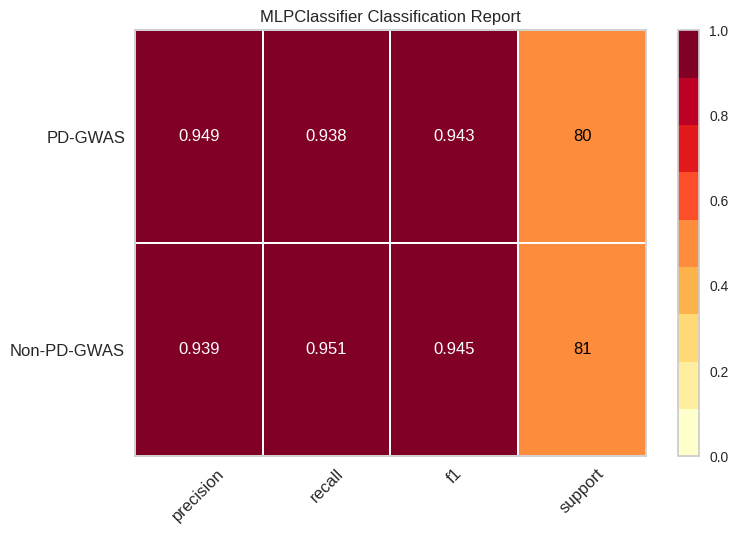

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


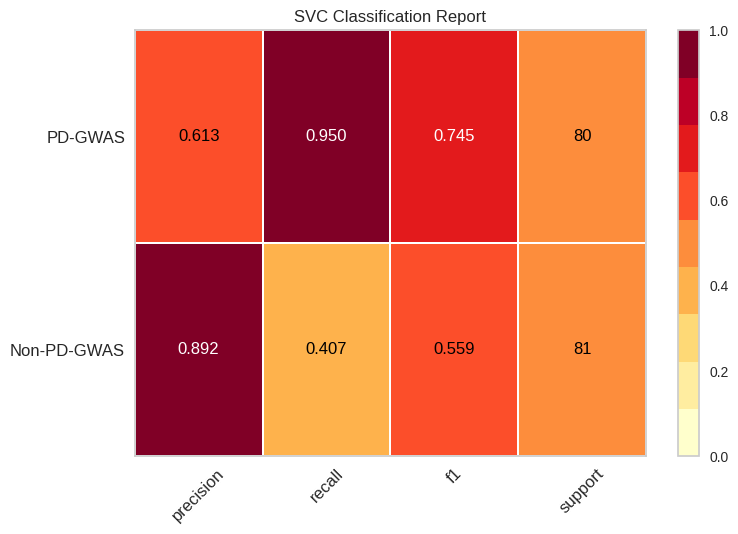

/usr/local/lib/python3.10/dist-packages/yellowbrick/base.py:390: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


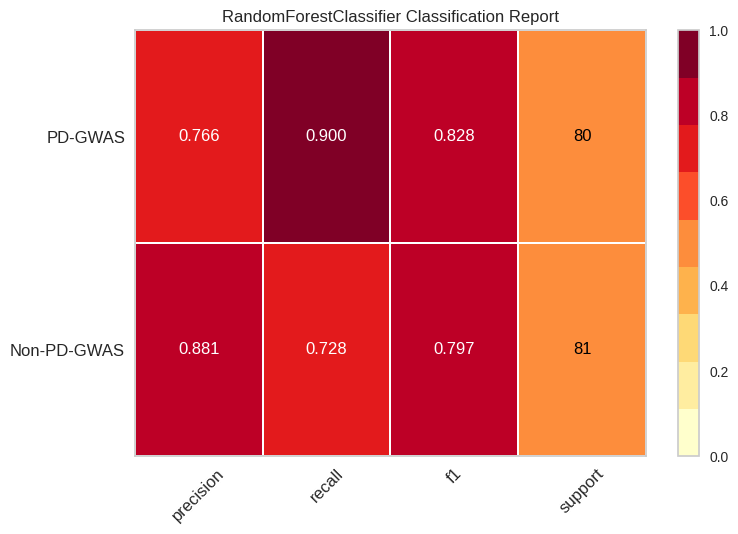

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
# model classification reporting for precision, recall, f1 and support.

classes = ["Non-PD-GWAS", "PD-GWAS"]

model = MLPClassifier()
visualizer = ClassificationReport(model, classes=classes, support=True)
visualizer.fit(X_train, y_train)
abcd = visualizer.score(X_test, y_test)
visualizer.show()


model_x1 = SVC(gamma='auto', probability=True)
visualizer_x1 = ClassificationReport(model_x1, classes=classes, support=True)
visualizer_x1.fit(X_train, y_train)
visualizer_x1.score(X_test, y_test)
visualizer_x1.show()

model_x2 = RandomForestClassifier(max_depth=2, random_state=0)
visualizer_x2 = ClassificationReport(model_x2, classes=classes, support=True)
visualizer_x2.fit(X_train, y_train)
visualizer_x2.score(X_test, y_test)
visualizer_x2.show()



## ROC Curve

The ROC curve results show that the MLP model has the best performance, followed by the random forest model and the SVM model. The MLP model achieved an AUC of 98%, while the random forest model achieved an AUC of 89% and the SVM model achieved an AUC of 88%.

An AUC of 98% is considered to be excellent performance, indicating that the MLP model is very good at distinguishing between positive and negative cases. AUCs of 89% and 88% are also considered to be good performance, indicating that the random forest and SVM models are also good at distinguishing between positive and negative cases.

⏬

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-15-01f346602ea3>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_x2.fit(X_train, y_train)


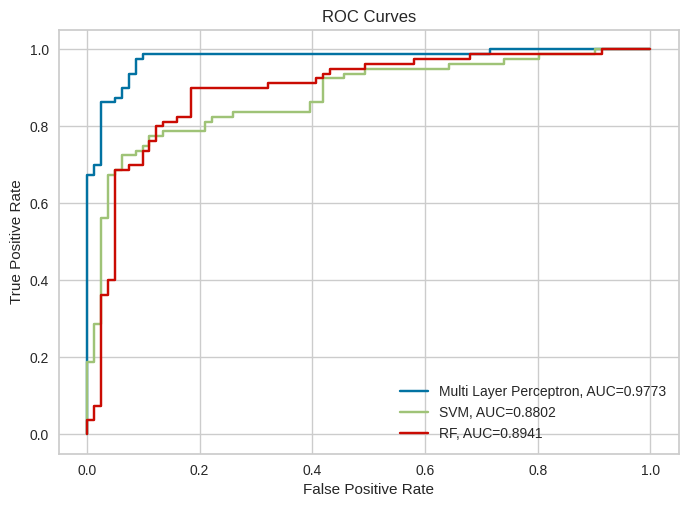

In [ ]:
# ROC Curve

model = MLPClassifier()
model_x1 = SVC(gamma='auto', probability=True)
model_x2 = RandomForestClassifier(max_depth=2, random_state=0)

model.fit(X_train, y_train)

model_x1.fit(X_train, y_train)

model_x2.fit(X_train, y_train)

plt.figure(0).clf()

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Multi Layer Perceptron, AUC="+str(auc))

y_pred = model_x1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

y_pred = model_x2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc))

plt.title("ROC Curves", loc = 'Center')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Model Preservation

In [ ]:
# saving model in a joblib file format

# Batch Inference of New Parkinson's Proteome

## Screening new PD proteins

We extracted 400 neurodegenerative-associated proteins from the DisGeNET database and preprocessed the data according to the protocol of this project. We then screened the dataset for new PD-associated proteins and identified 38 new proteins.

⏬

In [ ]:
# screening new PD proteins

df3 = pd.read_csv('/data/tripeptide_400.csv', header=None)
df4 = pd.read_csv('/data/400.csv', header=None)

df4 = df4.values.tolist()
prediction = visualizer.predict(df3)
prediction = prediction.tolist()

print("Uniprot IDs of proteins predicted to be involved in Parkinson Disease: \n")
for index, value in enumerate(prediction):
  if value == 1: print(df4[index])

Uniprot IDs of proteins predicted to be involved in Parkinson Disease: 

['P54253']
['P37840']
['O43612']
['P05231']
['Q16352']
['Q99720']
['P35637']
['P05019']
['P02649']
['P16949']
['P07196']
['Q16143']
['P30536']
['P01375']
['Q07666']
['P37198']
['P13985']
['Q9BVK6']
['Q9UQ35']
['Q6XE24']
['Q9NPG2']
['O43464']
['P41159']
['Q8WYQ3']
['P19338']
['O60828']
['Q14203']
['P78423']
['P0CG47']
['Q9BT76']
['Q96FF9']
['P09651']
['P01303']
['P60201']
['Q16566']
['Q7L0J3']
['Q9UEE9']
['P18509']
['P06850']
['Q16698']
['P05091']
['P22626']
['P35453']
['P41217']
['P54802']
['Q9Y6H1']
['P21246']
['P23297']
['O43914']


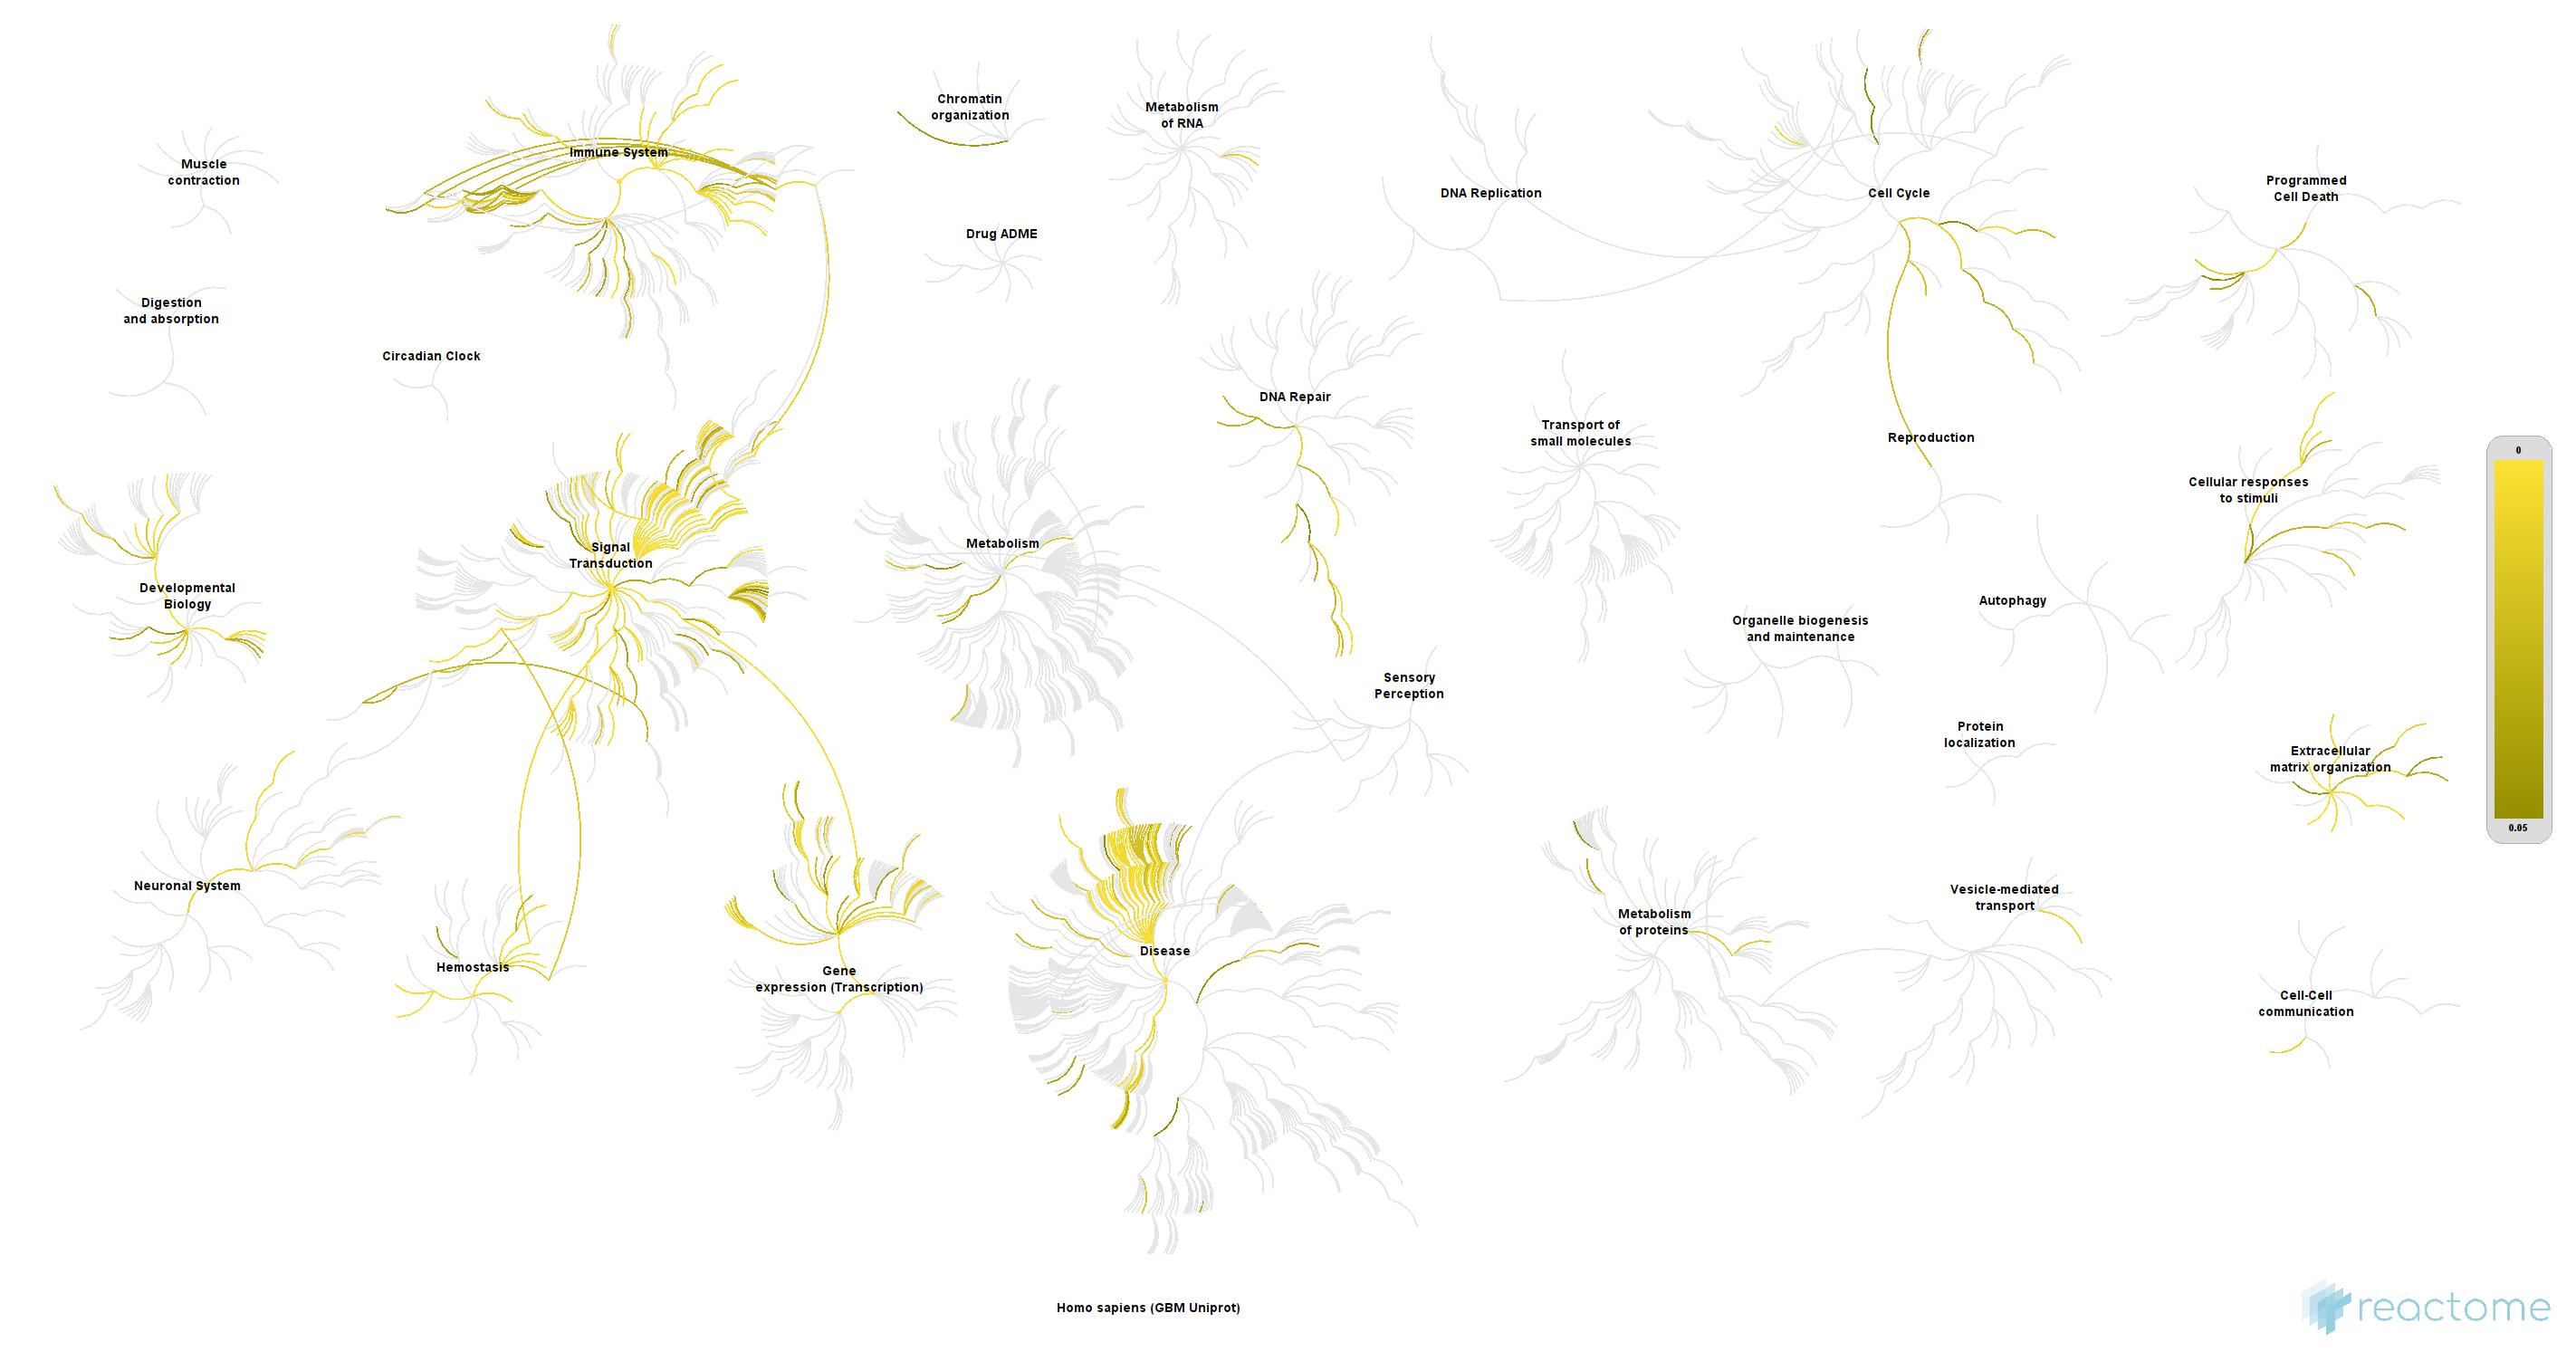

In [ ]:
# geneset enrichment analysis of the newly predicted proteins

Image("/data/img.jpg")

# Conclution and Prospects

The processes like m-rna processing, m-rna slicing and neurogenesis around the synapse area might have a putative role in the disease biology of Parkinson Disease. The study consisted of two major data classes including the thripeptide dataset of 235 putataive Parkinson diease association proteins aginst as the main class and tripeptide dataset of 250 random proteins as the decoy class. The total build matrix size reach out to 3.8 million entries. The Multi-layer Perceptron algorithm was trained on both the classes with the following evaluations:
>* Precision = 95%
>* Recall = 93%
>* F1 = 94%
>* ROC = 98%

The neurodegenrative gene set consisting of 400 proteins were screened to predict a new potential proteome consisting of 38 proteins. The  new proteome plays a pivotal role in and around the synapse; performing molecular functions like Rna-Binding, growth factors and neuropeptides; playing or inserting an effect over major processes in and around mrna processing, mrna splicing and neurogenesis.

# About Me:

I am a Bioinformatics and Machine learning expert, practecing insilico development and analytics in the domain of biology and medicine. I am open for research collaborations, you can email me to discuss.

Thank you,
```
Ahsan Raza

Masters in Bioinformatics

aysanraza@gmail.com

Islamabad, Pakistan.
```

# 💻 Tech Stack:
![Python](https://img.shields.io/badge/python-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54) ![Shell Script](https://img.shields.io/badge/shell_script-%23121011.svg?style=for-the-badge&logo=gnu-bash&logoColor=white) ![Anaconda](https://img.shields.io/badge/Anaconda-%2344A833.svg?style=for-the-badge&logo=anaconda&logoColor=white) ![GitHub](https://img.shields.io/badge/GitHub-%23121011.svg?style=for-the-badge&logo=github&logoColor=white) 	![Neo4J](https://img.shields.io/badge/Neo4j-008CC1?style=for-the-badge&logo=neo4j&logoColor=white) ![SQLite](https://img.shields.io/badge/sqlite-%2307405e.svg?style=for-the-badge&logo=sqlite&logoColor=white) ![MySQL](https://img.shields.io/badge/mysql-%2300f.svg?style=for-the-badge&logo=mysql&logoColor=white) ![scikit-learn](https://img.shields.io/badge/scikit--learn-%23F7931E.svg?style=for-the-badge&logo=scikit-learn&logoColor=white) ![SciPy](https://img.shields.io/badge/SciPy-%230C55A5.svg?style=for-the-badge&logo=scipy&logoColor=%white) ![Plotly](https://img.shields.io/badge/Plotly-%233F4F75.svg?style=for-the-badge&logo=plotly&logoColor=white) ![TensorFlow](https://img.shields.io/badge/TensorFlow-%23FF6F00.svg?style=for-the-badge&logo=TensorFlow&logoColor=white) ![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white) ![NumPy](https://img.shields.io/badge/numpy-%23013243.svg?style=for-the-badge&logo=numpy&logoColor=white) ![Keras](https://img.shields.io/badge/Keras-%23D00000.svg?style=for-the-badge&logo=Keras&logoColor=white) ![GIT](https://img.shields.io/badge/Git-fc6d26?style=for-the-badge&logo=git&logoColor=white) ![LINUX](https://img.shields.io/badge/Linux-FCC624?style=for-the-badge&logo=linux&logoColor=black)

## 💰 You can help me by Donating
  [![BuyMeACoffee](https://img.shields.io/badge/Buy%20Me%20a%20Coffee-ffdd00?style=for-the-badge&logo=buy-me-a-coffee&logoColor=black)](https://buymeacoffee.com/https://www.buymeacoffee.com/aysanraza)